In [56]:
#importar bibliotecas requeridas
import matplotlib.pyplot as plt
import numpy as np
import math
from timeit import default_timer as timer

In [57]:
#funcion, gradiente y hessiano 

#función a evaluar
def f(x1, x2):
    a = (np.e**(-x1**2 - x2**2))*x1
    return a


# gradiente  ∇f
def grad(x1, x2):
    list1 = [1-2*x1**2, -2*x1*x2]
    descenso = np.array(list1)*math.e**(-x1**2 - x2**2)
    return descenso

#Hessiano ∇^2f
def hessiano(x, y):
    axax = (2*x*((2*x**2)-3))*math.e**(-(x**2) - (y**2))
    ayay = (2*x*((2*y**2) - 1))*math.e**(-(x**2) - (y**2))
    axay = 2*(2*x**2 - 1)*y*math.e**(-x**2 - y**2)
    # return axay
    return np.array([
        [axax, axay],
        [axay, ayay]
    ])


# dirección del gradiente p
def dirgrad(x1, x2):
    vgrad = grad(x1, x2)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p




In [58]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX1 = x0[0] + p[0] * alpha
    paX2 = x0[1] + p[1] * alpha
    return f(paX1, paX2)


def phipAlpha(x0, alpha, p):
    x1 = x0[0] + alpha * p[0]
    x2 = x0[0] + alpha * p[1]
    vgrad = grad(x1, x2)
    return(np.dot(vgrad, p))


def phipp(x0, alpha, p):
    val = []
    for a in alpha:
        x1 = x0[0] + a * p[0]
        x2 = x0[0] + a * p[1]
        ahess = hessiano(x1, x2)
        val.append(np.dot(np.dot(ahess, p), p))
    return val


In [59]:
#Algoritmos para buscar minimo
def exhaustivoRefinado(p, xini, alpha=0, h=0.1, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            fnow = phiAlpha(xini, alpha, p)
            # print(k, h, fnow)
            k += 1
        alpha = alpha-h
        h = h / 10
    return alpha


def gradDescent(x0):
    p = dirgrad(x0[0], x0[1])
    alpha = exhaustivoRefinado(p, x0)
    # TODO: buscar alpha con newton para mayor precisión ?
    x0 = x0 + alpha*p
    return x0


def forsyte(x0, k=0, m=0, tol=1e-4):
    """Algoritmo de forsyte."""
    print("k, x^(k), p^(k), f(x^k), t")
    while np.linalg.norm(grad(x0[0], x0[1])) >= tol:
        x1 = gradDescent(x0)
        x2 = gradDescent(x1)
        y = x2
        d = (y - x0)/np.linalg.norm(y-x0)
        alpha = exhaustivoRefinado(d, x0)
        # TODO: buscar alpha con newton para mayor precisión ?
        # print(f"alpha: {alpha}")
        x0 = x0 + alpha*d
        itTime = timer()
        print(f"{k}, {x0}, {d} , {f(x0[0],x0[1])},{itTime}")
        k = k + 1
    return x0


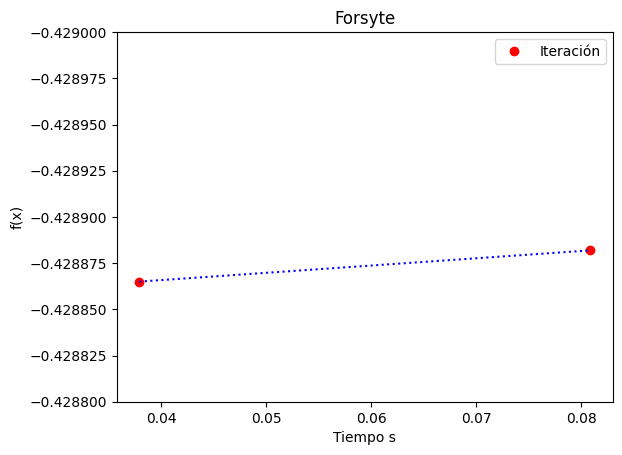

In [60]:
#graficación Forsyte
from cProfile import label


tiempoForsyte = [0.037907649, 0.080838003]
fxForsyte = [-0.4288650, -0.4288819]
plt.plot(tiempoForsyte, fxForsyte, 'ro', label="Iteración")
plt.plot(tiempoForsyte, fxForsyte, 'b:')
plt.ylim(ymin= -0.4288, ymax= -0.429)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.legend(loc=1)
plt.title("Forsyte")
plt.show()


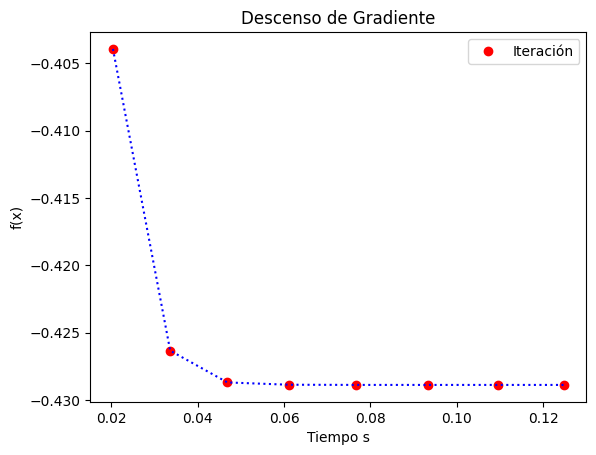

In [61]:
# Graficación descenso de Gradiente
tiempoGrad = [
    0.020350272, 0.033609113, 0.046863763, 0.06108015, 0.076596472, 0.093431743, 0.109607472, 0.124786822
]
fxGrad = [-0.4039332, -0.4263372, -0.4286974, -0.4288679, -
      0.4288809, -0.4288819, -0.4288819, -0.4288819]
plt.plot(tiempoGrad, fxGrad, 'ro', label="Iteración")
plt.plot( tiempoGrad, fxGrad, 'b:' )
plt.legend(loc=1)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.title("Descenso de Gradiente")
plt.show()


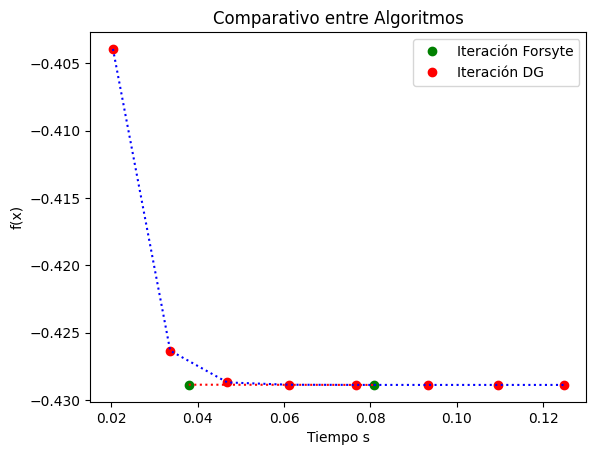

In [62]:
plt.plot(tiempoForsyte, fxForsyte, 'go', label="Iteración Forsyte")
plt.plot(tiempoForsyte, fxForsyte, 'r:')

plt.plot(tiempoGrad, fxGrad, 'ro', label="Iteración DG")
plt.plot(tiempoGrad, fxGrad, 'b:')
plt.legend(loc=1)
plt.ylabel('f(x)')
plt.xlabel('Tiempo s')
plt.title("Comparativo entre Algoritmos")
plt.show()